In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [9]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'

In [10]:
#Setting image height and width
img_width = 180
img_height = 180

In [11]:
#Creating a dataset for training using TensorFlow and keras
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [12]:
data_cat = data_train.class_names

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [14]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split = False)

Found 359 files belonging to 36 classes.


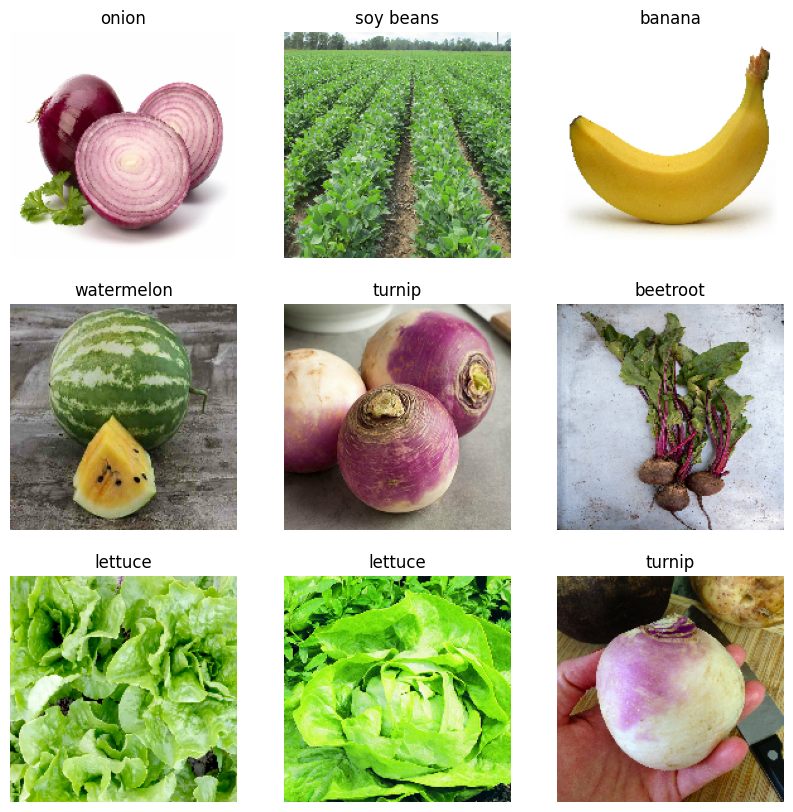

In [16]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [18]:
from tensorflow.keras.models import Sequential

In [23]:
#Building a sequential model
model = Sequential([
    layers.Rescaling(1./255), #Every image's color will stored in RGB format
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2), #Makes sure model is not overfitting
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [24]:
#Compiling the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:
epochs_size = 25
history = model.fit(data_train, validation_data= data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 444ms/step - accuracy: 0.0371 - loss: 5.4741 - val_accuracy: 0.2222 - val_loss: 2.7591
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.1945 - loss: 2.8142 - val_accuracy: 0.5670 - val_loss: 1.6933
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.3836 - loss: 2.1797 - val_accuracy: 0.7863 - val_loss: 0.9989
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.5839 - loss: 1.5127 - val_accuracy: 0.8490 - val_loss: 0.6697
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.7211 - loss: 0.9912 - val_accuracy: 0.8433 - val_loss: 0.6932
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.7825 - loss: 0.8050 - val_accuracy: 0.9088 - val_loss: 0.4193
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.8520 - loss: 0.4772 - val_accuracy: 0.9088 - val_loss: 0.4911
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.9052 - loss: 0.3391 - val_accu

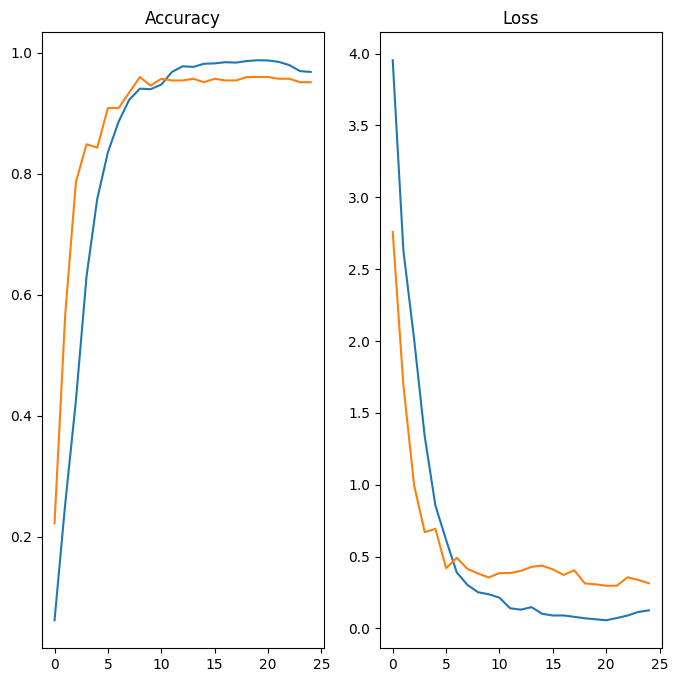

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.show()

In [66]:
image = 'banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
image_arr = tf.keras.utils.array_to_img(image) #Converting to array
image_bat=tf.expand_dims(image_arr,0)

In [67]:
predict = model.predict(image_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [68]:
score = tf.nn.softmax(predict)

In [69]:
print('The given image is a {} and the accuracy is {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The given image is a banana and the accuracy is 85.50


In [70]:
model.save('Image_classify.keras')